# Dattasai Danta | Data Science Intern | Oasis Infobyte | #Task 5

# <font color = red> **SALES PREDICTION USING PYTHON** </font>

In [1]:
#import libraries
# import pandas seaborn matplotlib numpy

# import pandas library and make it as pd:
import pandas as pd
#import numerical python library and make it as np
import numpy as np
#import seaborn library and make it as sns
import seaborn as sns
#import pyplot from matplotlib library and make it as plt:
import matplotlib.pyplot as plt
# inorder to surpress the warning import filterwarnings:
from warnings import filterwarnings
filterwarnings('ignore')
# import scipy library:
import scipy
from scipy import stats

In [2]:
# load advertising dataset:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
# check the size of the dataset:
df.shape

(200, 5)

`Interpretation:` There are 200 rows and 5 columns present in the dataset.

In [4]:
# name Changing
df.rename(columns={"Unnamed: 0":"Index"},inplace=True)

In [5]:
df

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
# Information about the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
# Datatypes:
df.dtypes

Index          int64
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [8]:
# load first 10 rows 
df.head(10)

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [9]:
# load last ten rows:
df.tail(10)

,Index,TV,Radio,Newspaper,Sales
190,191,39.5,41.1,5.8,10.8
191,192,75.5,10.8,6.0,9.9
192,193,17.2,4.1,31.6,5.9
193,194,166.8,42.0,3.6,19.6
194,195,149.7,35.6,6.0,17.3
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [10]:
# check for null values:
df.isnull().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

`interpretation:` There is no null values present in this dataset.

In [11]:
# total null values:
df.isnull().sum().sum()

0

`interpretation:` no null values.

In [12]:
# check for duplicate values:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [13]:
# total duplicate values
df.duplicated().sum()

0

`interpretation:` There is no duplicated values present in this dataset.

In [14]:
# Describe Statistics: 
# summary of num variables :
df.describe()

,Index,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


`INTERPREATION` It computes summary statistics for numerical columns in the DataFrame, including count, mean, standard deviation, minimum, maximum, and percentiles.

In [15]:
# Correlation:
# Correlation --> Relationship Between two Variables:


corr =df.corr()
corr

,Index,TV,Radio,Newspaper,Sales
Index,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


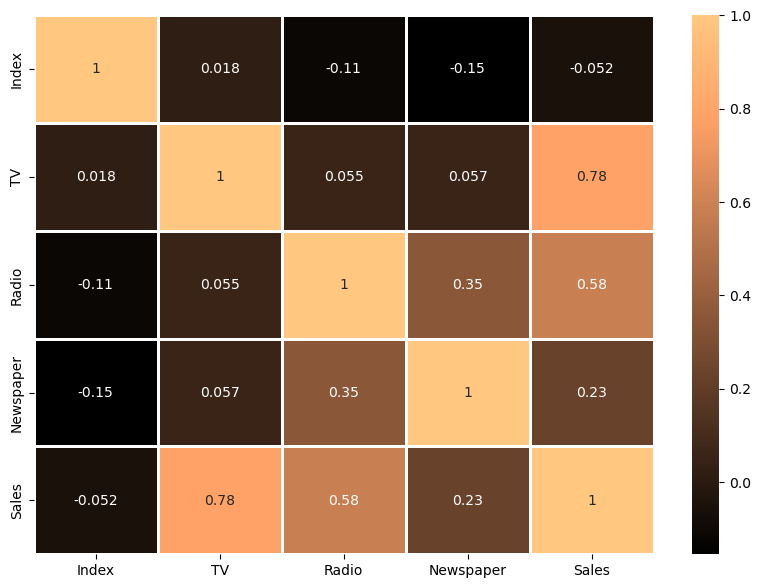

In [16]:
# set the plot size:

fig, ax = plt.subplots(figsize = (10, 7))

# plot a heapmap for the correlation matrix
# annot : print values in each cell
# linewidths : specify width of the line and specifying the plot
# vmin minimum value of the variable
# vmax maximum value of the variable
# cmap: colour code for the plot
# fmt : set the decimal place of the annot

sns.heatmap(corr, annot = True, linewidths = 0.95,
           cmap = 'copper', fmt = '.2g')
# display the plot:
plt.show()

`INTERPREATION` Here TV and Sales are the Strong Positive Correlation.

In [17]:
# covariance 

cov = df.cov()
cov

,Index,TV,Radio,Newspaper,Sales
Index,3350.000000,88.027387,-95.110050,-195.311558,-15.587186
TV,88.027387,7370.949893,69.862492,105.919452,350.390195
Radio,-95.110050,69.862492,220.427743,114.496979,44.635688
Newspaper,-195.311558,105.919452,114.496979,474.308326,25.941392
Sales,-15.587186,350.390195,44.635688,25.941392,27.221853


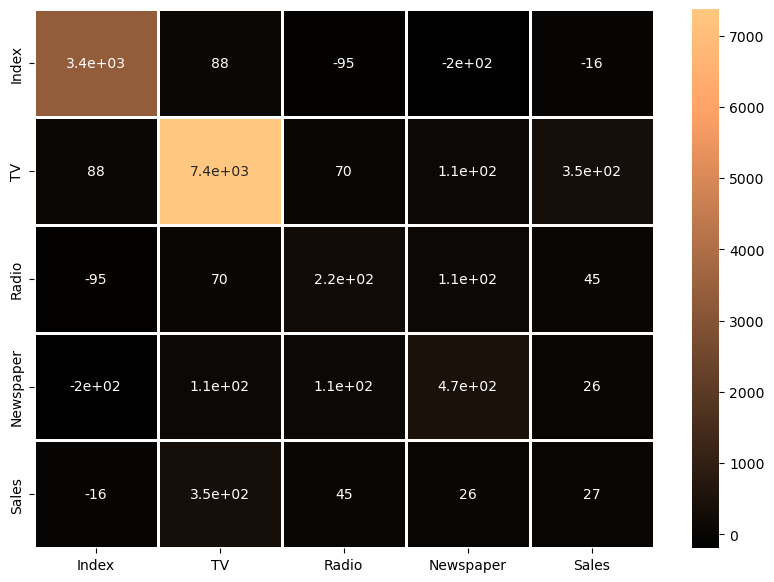

In [18]:
# covariance 

cov = df.cov()
cov

# set the plot size:

fig, ax = plt.subplots(figsize = (10, 7))

# plot a heapmap for the covariance matrix
# annot : print values in each cell
# linewidths : specify width of the line and specifying the plot
# vmin minimum value of the variable
# vmax maximum value of the variable
# cmap: colour code for the plot
# fmt : set the decimal place of the annot

sns.heatmap(cov, annot = True, linewidths = 0.95,
           cmap = 'copper', fmt = '.2g')

plt.show()

`INTERPREATION:` Here TV and TV is the 7370.949893 relatively High value

In [19]:
df['TV'].sum()

29408.5

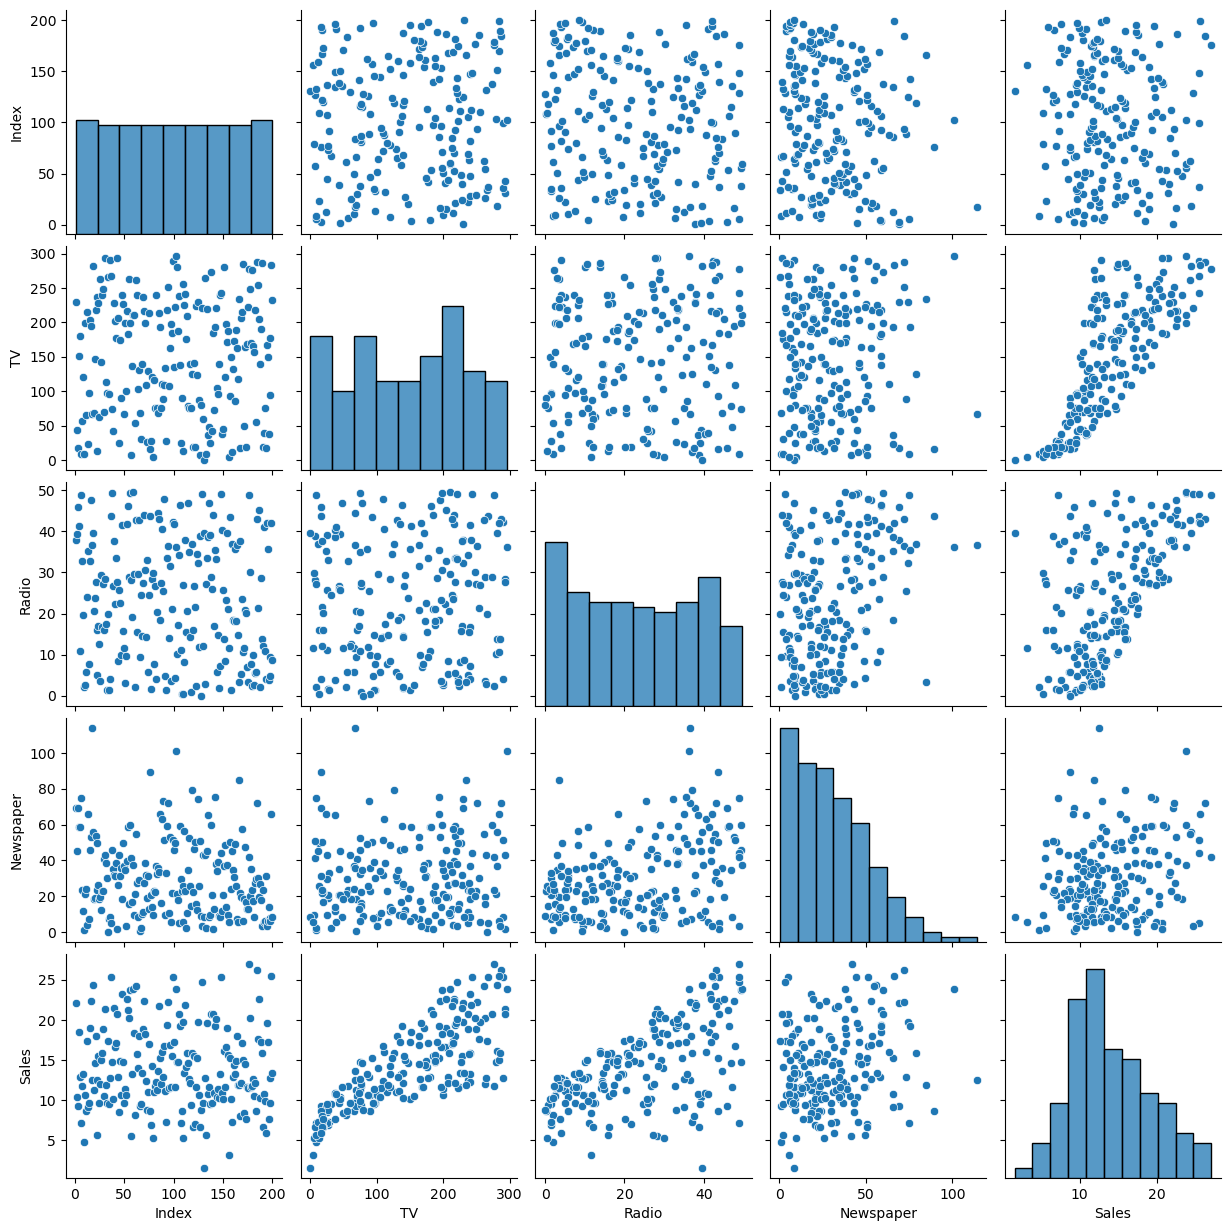

In [20]:
# pairplot:
sns.pairplot(data = df)
# display the plot:
plt.show()

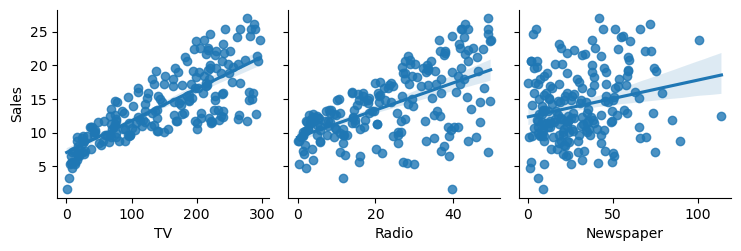

In [21]:
# to check linear relationship between independent varibles(x) and dependent variable(y):
sns.pairplot(df, x_vars=["TV", "Radio","Newspaper"], y_vars="Sales",kind='reg')

In [22]:
# skewness:
df.skew()

Index        0.000000
TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales        0.407571
dtype: float64

In [23]:
# kurtosis:
df.kurt()

Index       -1.200000
TV          -1.226495
Radio       -1.260401
Newspaper    0.649502
Sales       -0.408869
dtype: float64

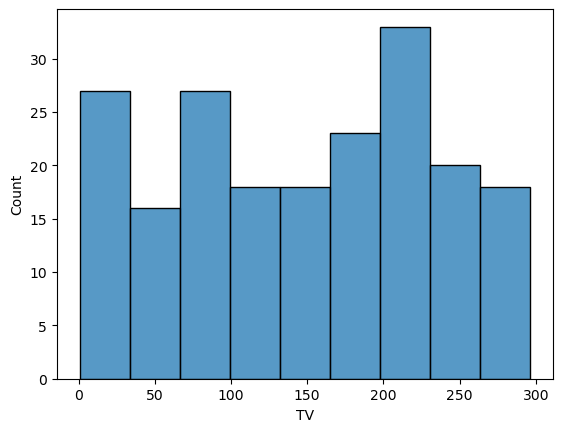

In [24]:
# histogram:
sns.histplot(df["TV"])
# display the plot:
plt.show()

`INTERPREATION:`The distribution of TV advertising is slightly left skewed.

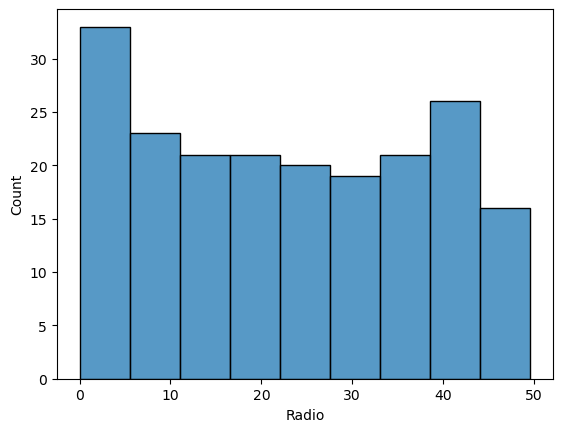

In [25]:
# histogram:
sns.histplot(df["Radio"])
# display the plot:
plt.show()

`INTERPREATION:`The distribution of Radio advertising is slightly right skewed.

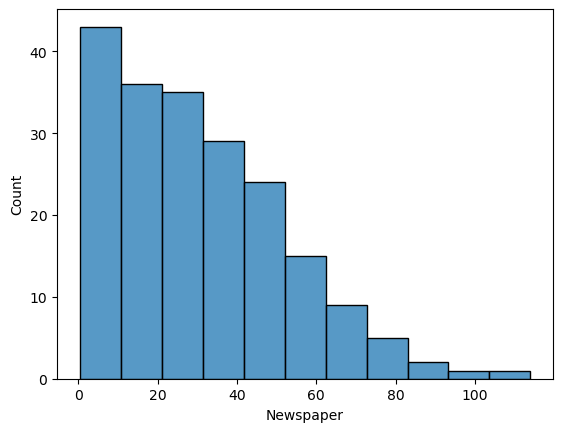

In [26]:
# histogram:
sns.histplot(df["Newspaper"])
# display the plot:
plt.show()

`INTERPREATION:`The distribution of Newspaper advertising is  significantly right skewed.

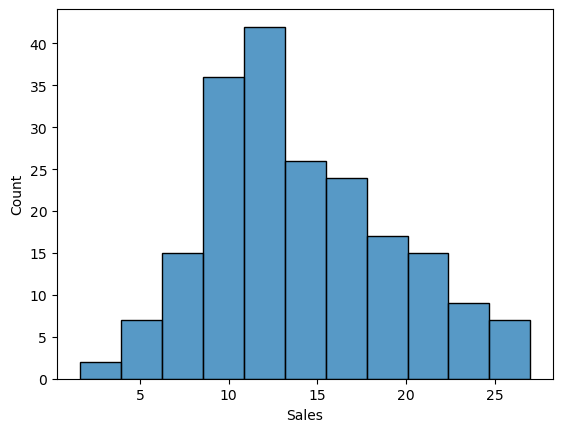

In [27]:
# histogram:
sns.histplot(df["Sales"])
# display the plot:
plt.show()

`INTERPREATION:`The distribution of Sales is slightly right skewed.

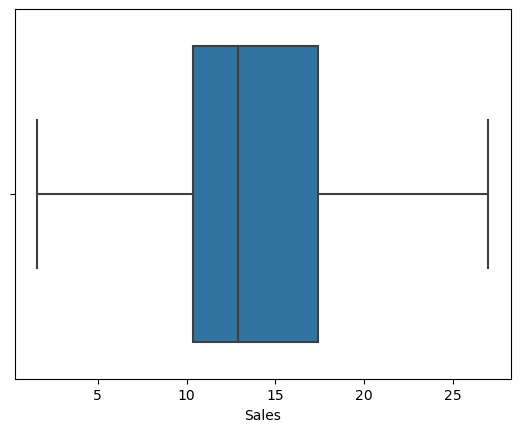

In [28]:
# boxplot:
sns.boxplot(x = 'Sales', data = df)
# Display the plot:
plt.show()

`INTERPRETATION` There is no outliers in this Sales Column

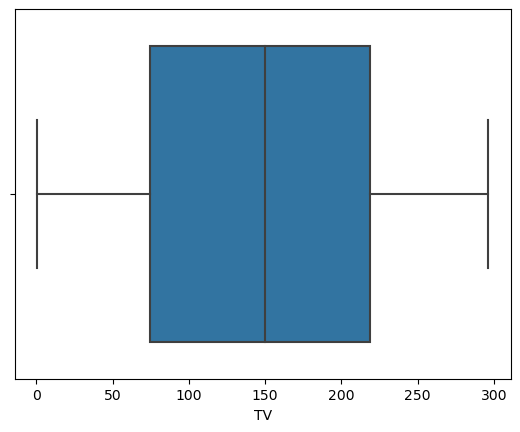

In [29]:
# boxplot:
sns.boxplot(x = 'TV', data = df)
# Display the plot:
plt.show()

`INTERPRETATION` There is no outliers in this TV Column

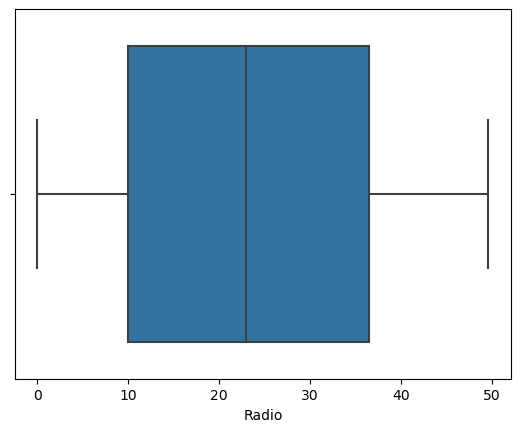

In [30]:
# boxplot:
sns.boxplot(x = 'Radio', data = df)
# Display the plot:
plt.show()

`INTERPRETATION` There is no outliers in this Radio Column

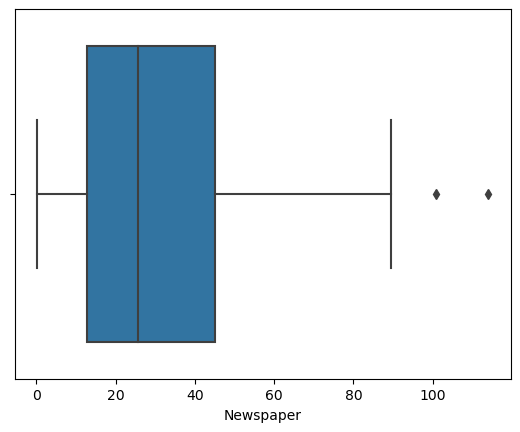

In [31]:
# boxplot:
sns.boxplot(x = 'Newspaper', data = df)
# Display the plot:
plt.show()

`INTERPREATION:`There are outliers present in this Newspaper column so we need to remove those outliers

In [32]:
# Calculate the IQR (Interquartile Range)
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame without outliers
df2 = df[(df['Newspaper'] >= lower_bound) & (df['Newspaper'] <= upper_bound)]

In [33]:
df2

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [34]:
df2.shape

(198, 5)

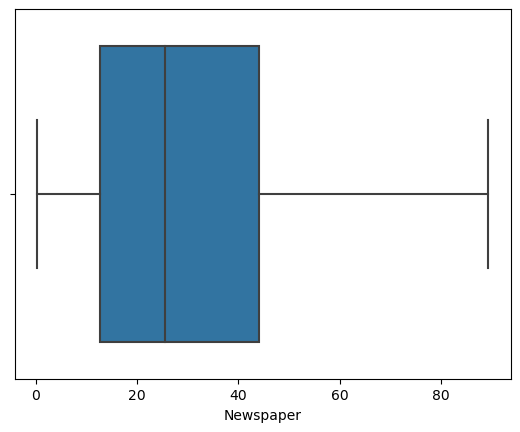

In [35]:
# boxplot:
sns.boxplot(x = 'Newspaper', data = df2)
# Display the plot:
plt.show()

`INTERPREATION:` Successfully Removed outliers.

<Axes: >

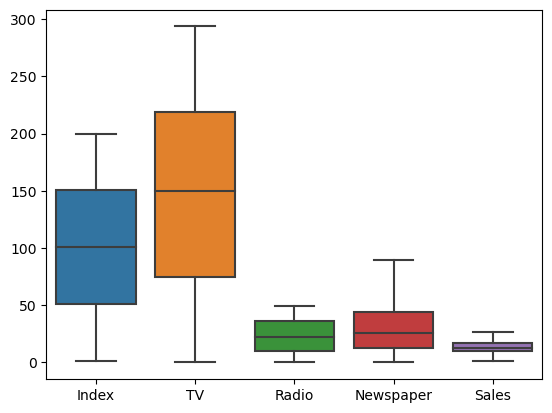

In [36]:
# BoxPlot:
sns.boxplot(data=df2)

`INTERPRETATION:` Now, there is no outliers present in this dataset

# Model Training:

In [37]:
X = df2.drop(['Index','Sales'], axis=1)
print(X)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[198 rows x 3 columns]


In [38]:
y = df2['Sales']
print(y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 198, dtype: float64


In [39]:
 # we need to split the data for training and testing:
from sklearn.model_selection import train_test_split
 # train- 70
 # test - 30


In [40]:
 x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)

In [41]:
# Linear regression:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [42]:
# model training:
model.fit(x_train,y_train)

LinearRegression()

In [43]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred = model.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {MSE:.2f}")
print(f"Root Mean Squared Error: {RMSE:.2f}")
print(f"R-squared: {R2:.2f}")

Mean Squared Error: 4.17
Root Mean Squared Error: 2.04
R-squared: 0.82


In [44]:
# print metric to get performance:
print('Accuracy: ', model.score(x_test, y_test)*100)

Accuracy:  81.99098828326147


In [45]:
model.coef_

array([ 0.04374431,  0.20223617, -0.00412945])

In [46]:
model.intercept_

3.083153885439474

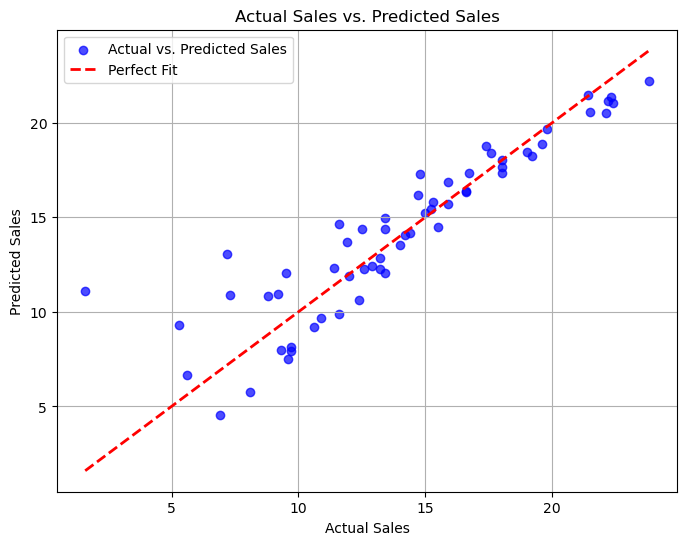

In [47]:
# Visualize the model's predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o', alpha=0.7, label='Actual vs. Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs. Predicted Sales")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [48]:
# create new dataframe:
new_df = pd.DataFrame({
    'TV': [256, 56, 75],
    'Radio': [45, 16, 30],
    'Newspaper': [10, 5, 15]
})
new_df = pd.DataFrame(new_df)
print(new_df)
new_predictions = model.predict(new_df[['TV', 'Radio', 'Newspaper']])

# Display the predictions for the new data
print("Predictions for New Data:")
print(new_predictions)

    TV  Radio  Newspaper
0  256     45         10
1   56     16          5
2   75     30         15
Predictions for New Data:
[23.34103137  8.7479669  12.36912068]
